In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from labellines import labelLine, labelLines

In [91]:
data_N200M30 = pd.read_csv('./raw_data/NIFTY200Momentum30.csv')[::-1]
data_N50 = pd.read_csv('./raw_data/NIFTY50.csv')[::-1]
data_NN50 = pd.read_csv('./raw_data/NIFTY_NEXT50.csv')[::-1]
data_ALowVol = pd.read_csv('./raw_data/NIFTY_ALPHALOWVOL.csv')[::-1]
data_M150Q50 = pd.read_csv('./raw_data/NIFTY_MIDCAP150_QUALITY50.csv')[::-1]
data_N100LowVol30 = pd.read_csv('./raw_data/NIFTY100_LOWVOL30.csv')[::-1]

In [136]:
def plot_rolling_returns(years, title=''):
    days = 248  # avg. # of trading days in a year

    data_N200M30['NIFTY200Momentum30'] = ((1 + data_N200M30.Close.pct_change(periods= days * years)) ** (1 / years) - 1) * 100
    data_N50['NIFTY50'] = ((1 + data_N50.Close.pct_change(periods= days * years)) ** (1 / years) - 1) * 100
    data_NN50['NIFTY_NEXT50'] = (( 1 + data_NN50.Close.pct_change(periods=days * years)) ** (1 / years) - 1) * 100
    data_ALowVol['NIFTY_ALPHALOWVOL'] = (( 1 + data_ALowVol.Close.pct_change(periods=days * years)) ** (1 / years) - 1) * 100
    data_M150Q50['NIFTY_MIDCAP150_QUALITY50'] = (( 1 + data_M150Q50.Close.pct_change(periods=days * years)) ** (1 / years) - 1) * 100
    data_N100LowVol30['NIFTY100_LOWVOL30'] = (( 1 + data_N100LowVol30.Close.pct_change(periods=days * years)) ** (1 / years) - 1) * 100

    ax = data_N200M30.plot.line(x='Date', y='NIFTY200Momentum30', figsize=(25,15), title=title)
    data_N50.plot.line(x='Date', y='NIFTY50', ax=ax)
    data_NN50.plot.line(x='Date', y='NIFTY_NEXT50', ax=ax)
    data_ALowVol.plot.line(x='Date', y='NIFTY_ALPHALOWVOL', ax=ax)
    data_M150Q50.plot.line(x='Date', y='NIFTY_MIDCAP150_QUALITY50', ax=ax)
    data_N100LowVol30.plot.line(x='Date', y='NIFTY100_LOWVOL30', ax=ax)
    ax.labelsize = 'large'
    
    labelLines(plt.gca().get_lines(), zorder=5.5)

In [137]:
print('------------------------------ Volatility (Descending) ------------------------------')
print('NIFTY NEXT50               => ' + str(data_NN50.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY 200 Momentum 30      => ' + str(data_N200M30.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY 50                   => ' + str(data_N50.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY100 LOWVOL30          => ' + str(data_N100LowVol30.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY ALPHA LOW VOL        => ' + str(data_ALowVol.Close.pct_change().std() * 252 ** 0.5))
print('NIFTY MIDCAP150 QUALITY50  => ' + str(data_M150Q50.Close.pct_change().std() * 252 ** 0.5))
print('-------------------------------------------------------------------------------------')

------------------------------ Volatility (Descending) ------------------------------
NIFTY NEXT50               => 0.24055981749207783
NIFTY 200 Momentum 30      => 0.23130497386699359
NIFTY 50                   => 0.22356064546339216
NIFTY100 LOWVOL30          => 0.1803447987680543
NIFTY ALPHA LOW VOL        => 0.18212595745953156
NIFTY MIDCAP150 QUALITY50  => 0.18398111537292478
-------------------------------------------------------------------------------------


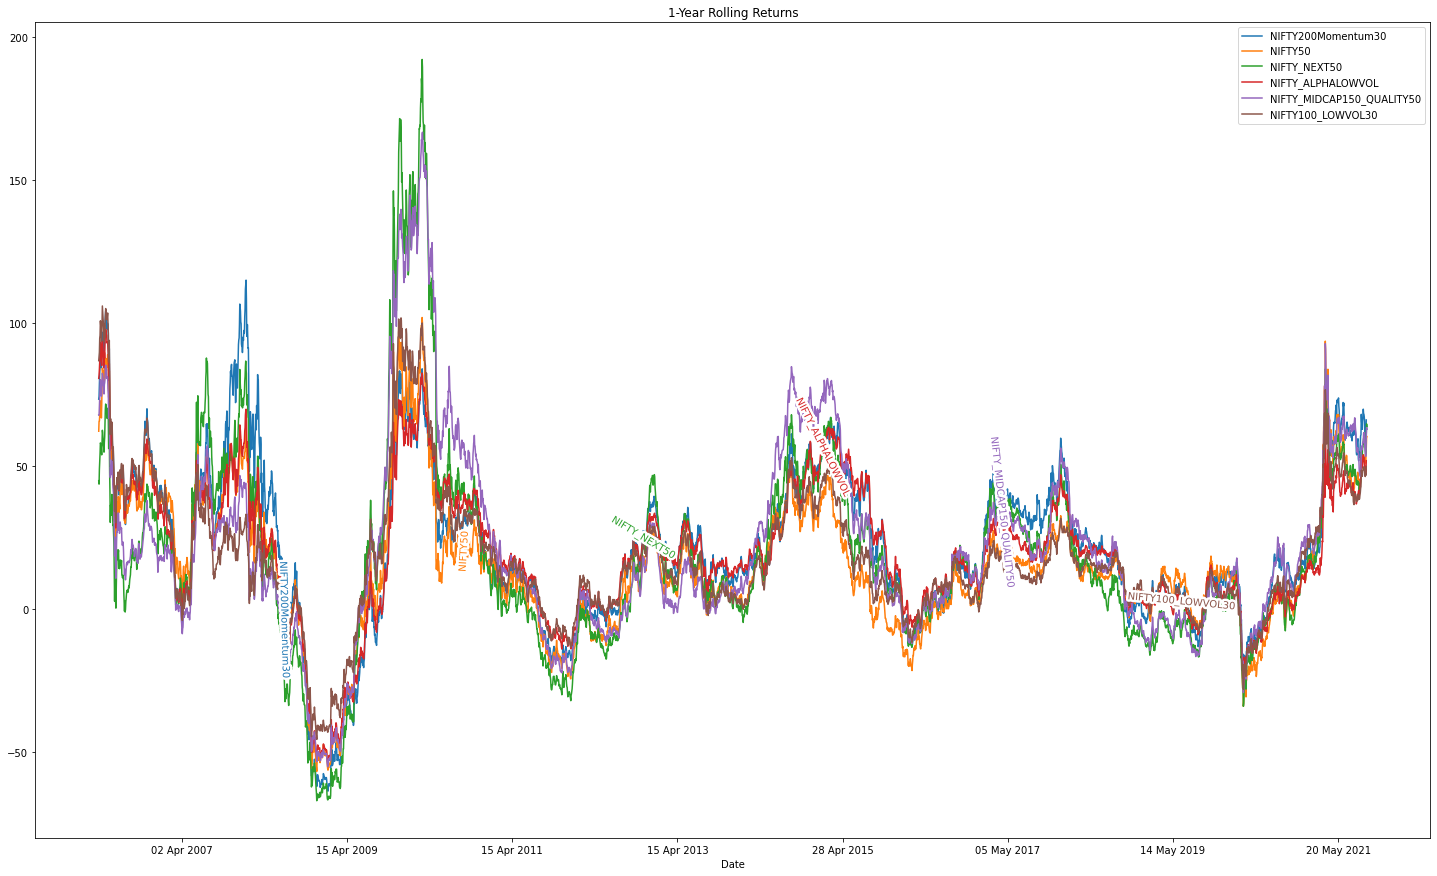

In [138]:
plot_rolling_returns(years=1, title='1-Year Rolling Returns')

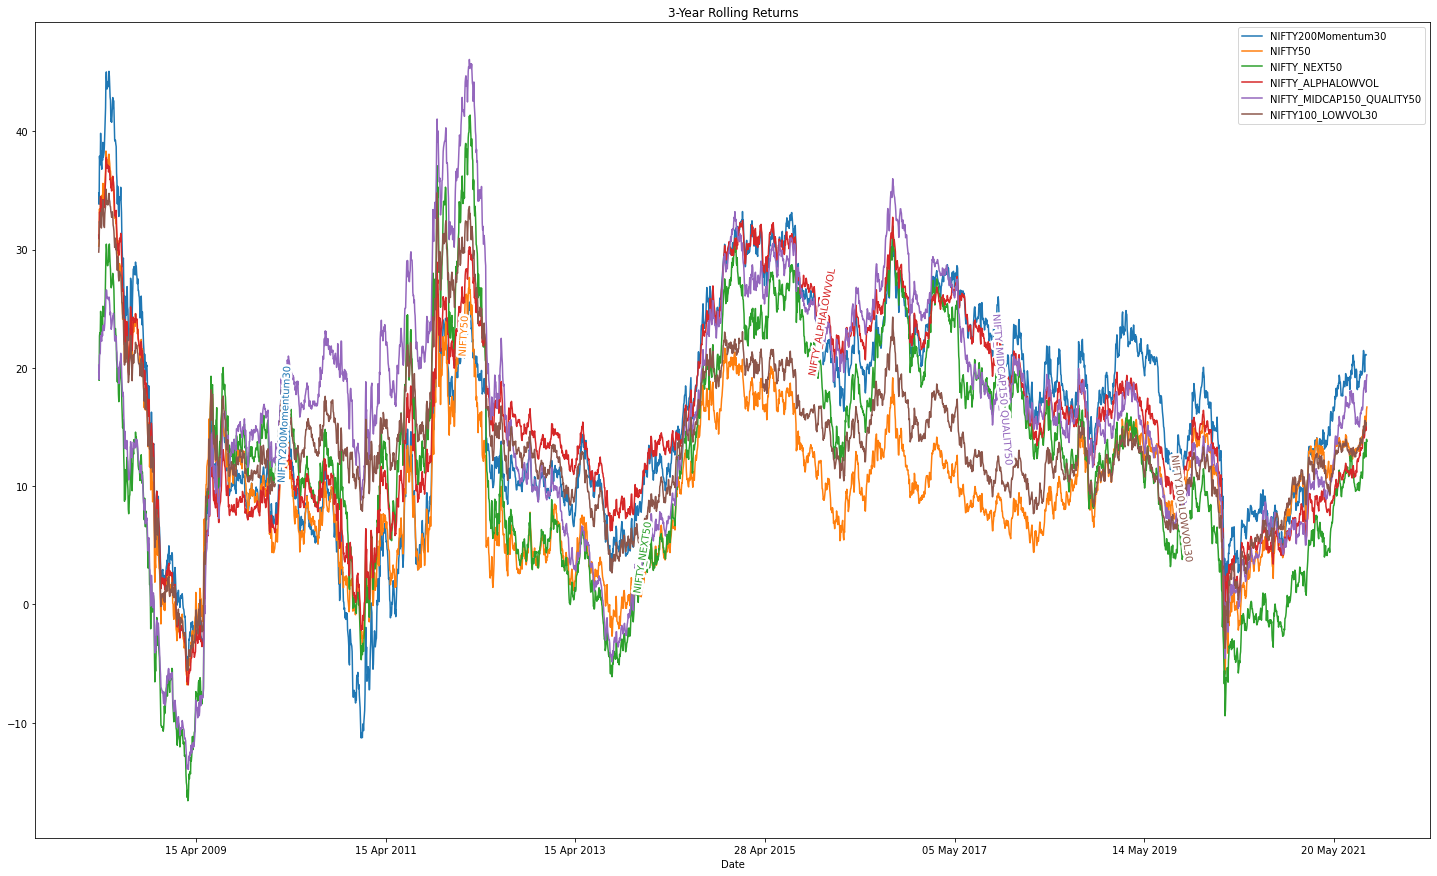

In [139]:
plot_rolling_returns(years=3, title='3-Year Rolling Returns')

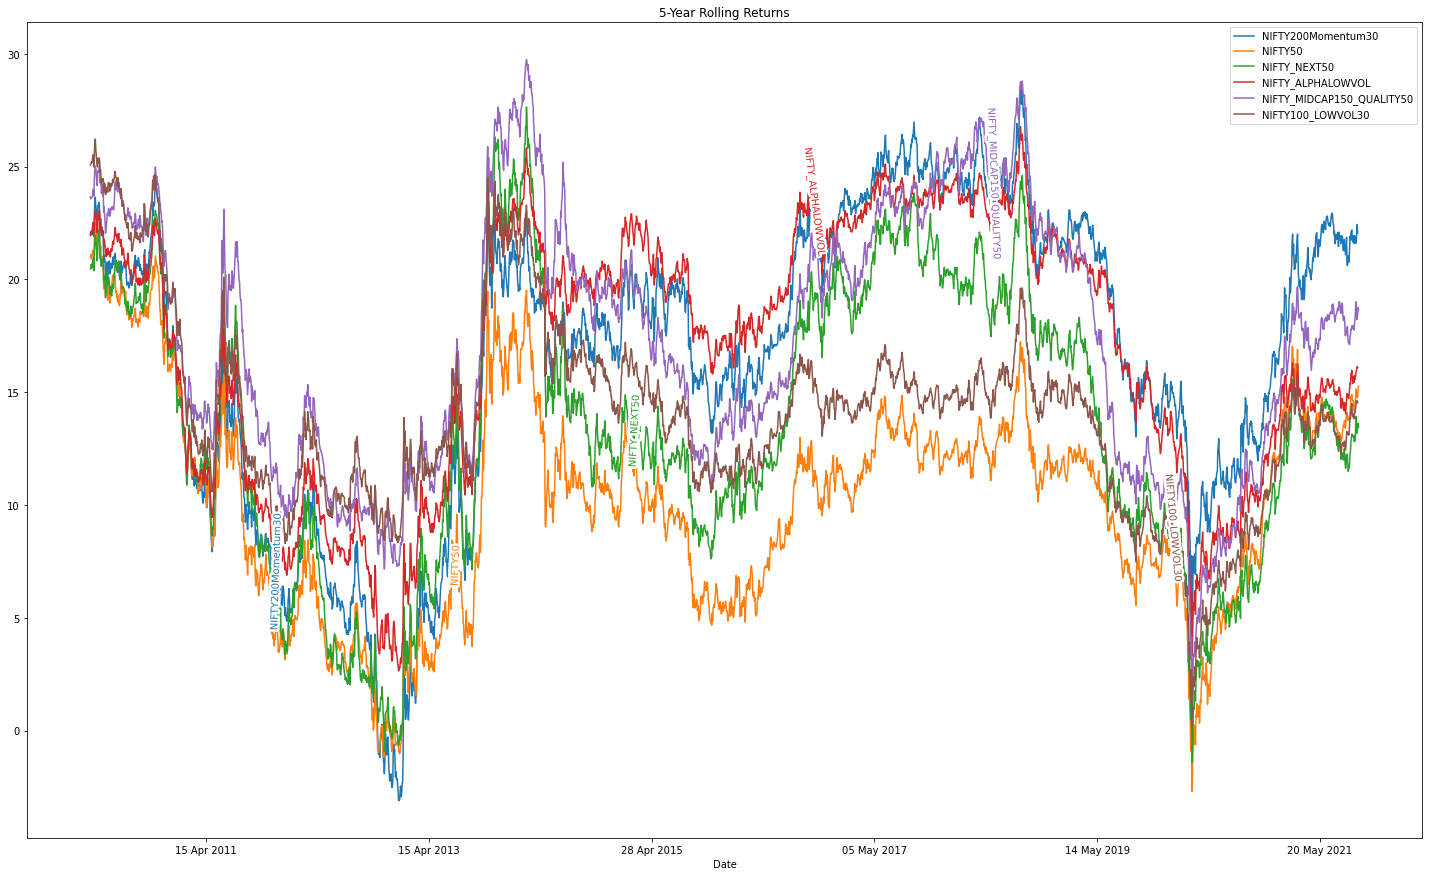

In [140]:
plot_rolling_returns(years=5, title='5-Year Rolling Returns')

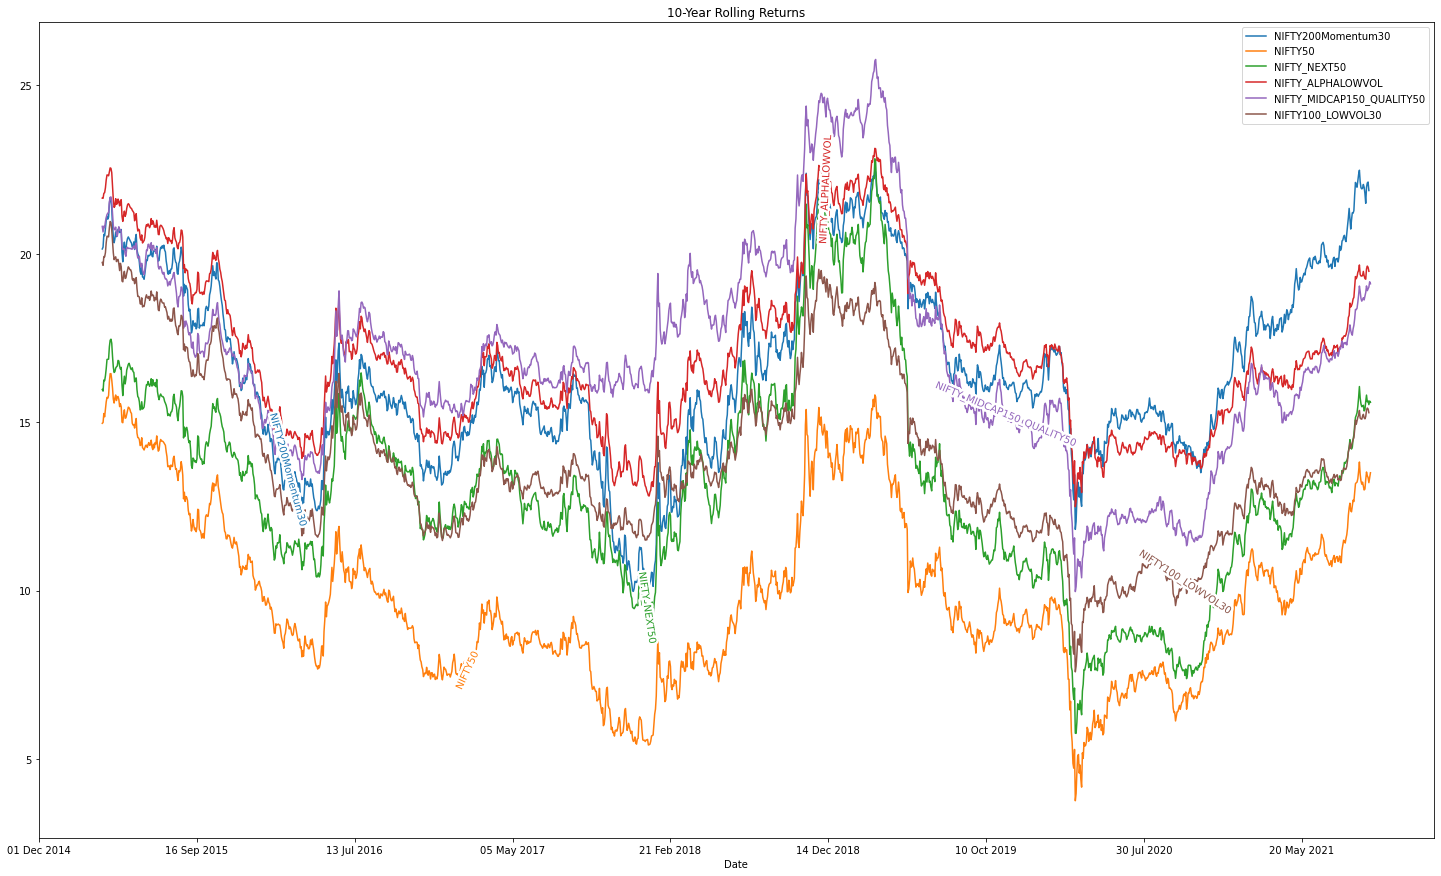

In [141]:
plot_rolling_returns(years=10, title='10-Year Rolling Returns')